## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#sns.set_context("poster")
#sns.set_context(None)

## READING DATA

In [2]:
data = pd.read_excel("1645792390_cep1_dataset.xlsx")

### Perform preliminary data inspection 

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Get a preliminary statistical summary of the data 

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot: xlabel='target', ylabel='count'>

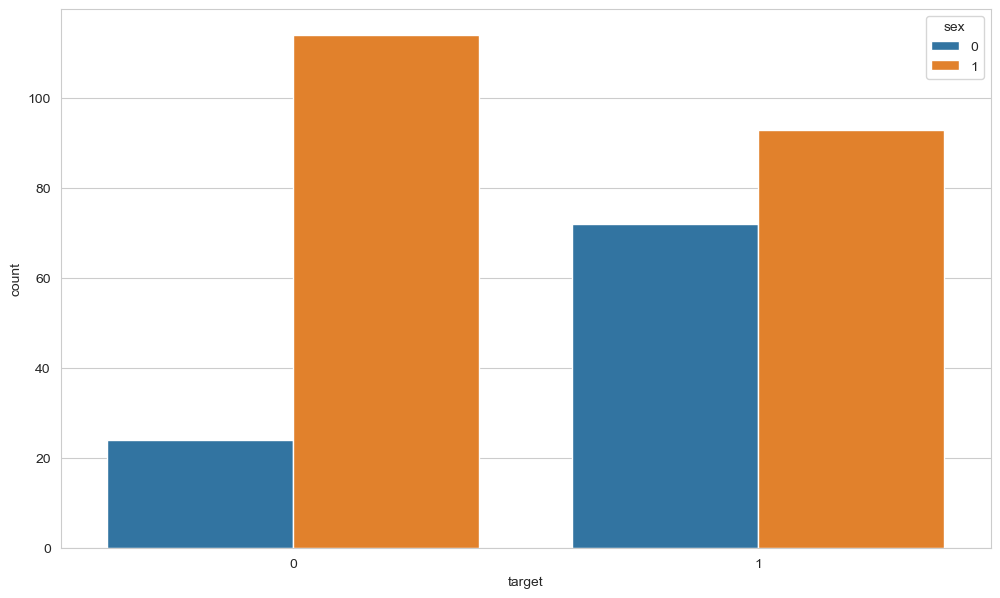

In [7]:
sns.countplot(data=data, x='target', hue='sex')

<AxesSubplot: xlabel='age', ylabel='Count'>

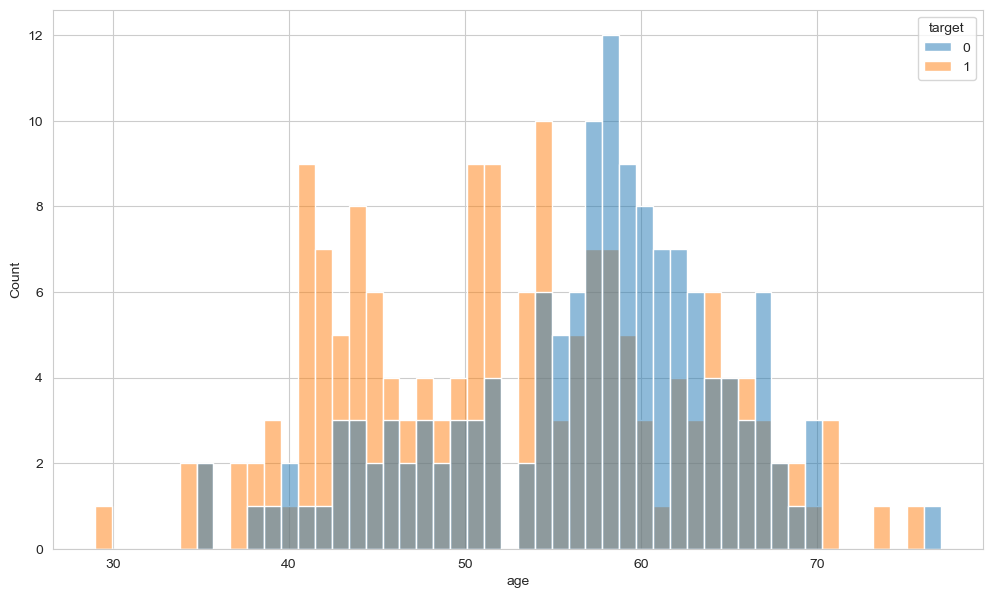

In [8]:
sns.histplot(data=data, x='age', bins=50, hue='target')

### Study the occurrence of CVD across the Age category

<AxesSubplot: xlabel='age'>

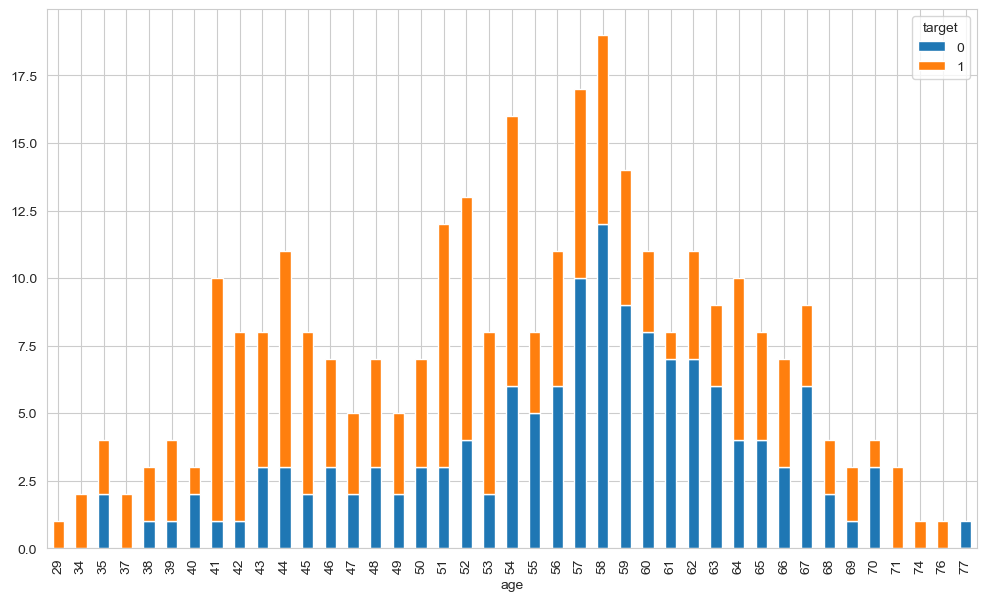

In [9]:
age_cvd_counts=data.groupby("age")['target'].value_counts().unstack()
age_cvd_counts.plot(kind='bar', stacked=True)

### Study the composition of all patients with respect to the Sex category

<AxesSubplot: ylabel='proportion'>

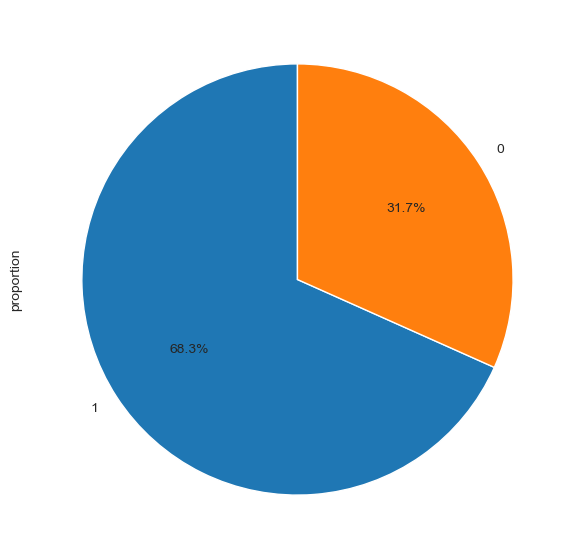

In [10]:
sex_counts=data['sex'].value_counts(normalize=True)
sex_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)

### Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

<AxesSubplot: xlabel='trestbps'>

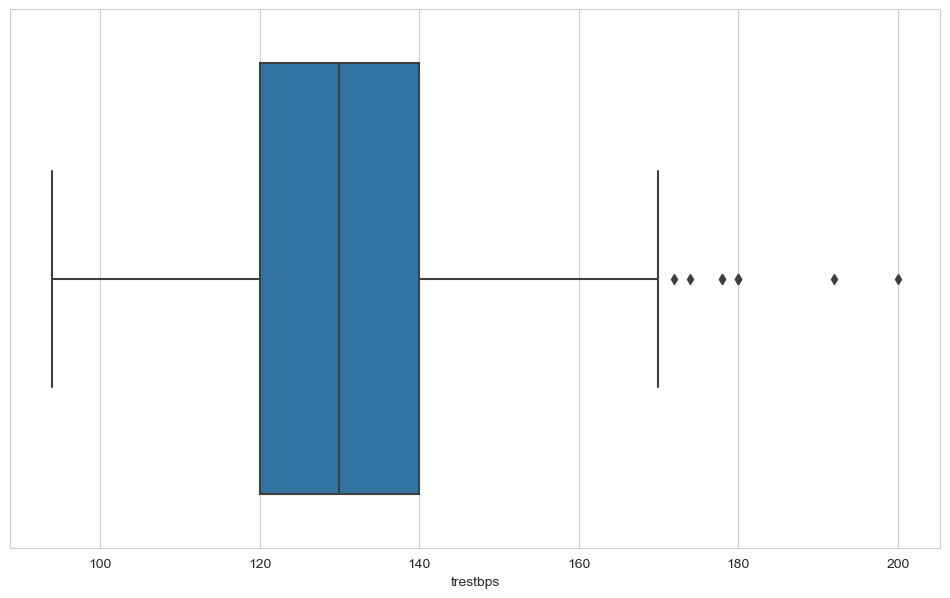

In [11]:
sns.boxplot(data=data, x='trestbps', hue='target')

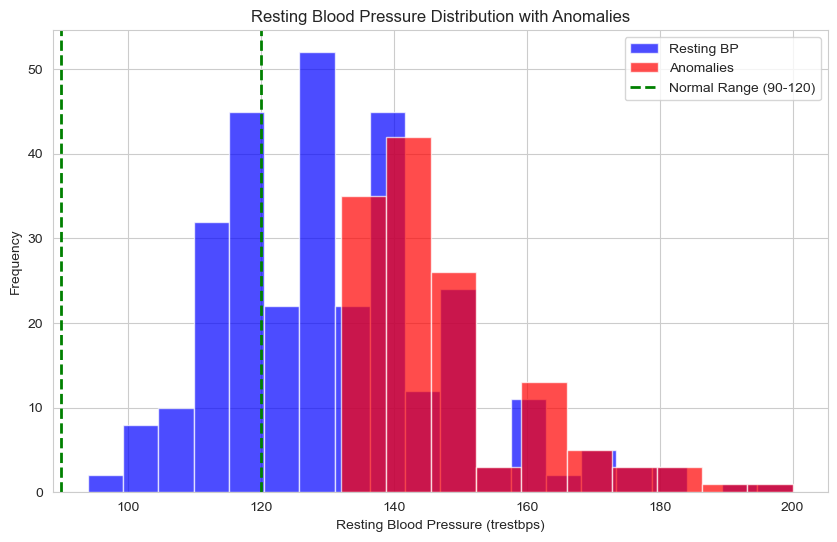

In [12]:
anomalies = data[(data['trestbps'] < 90) | (data['trestbps'] > 130)]

# Plot the resting blood pressure distribution
plt.figure(figsize=(10, 6))
plt.hist(data['trestbps'], bins=20, color='blue', alpha=0.7, label='Resting BP')
plt.hist(anomalies['trestbps'], bins=10, color='red', alpha=0.7, label='Anomalies')
plt.axvline(90, color='green', linestyle='dashed', linewidth=2, label='Normal Range (90-120)')
plt.axvline(120, color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Resting Blood Pressure (trestbps)')
plt.ylabel('Frequency')
plt.title('Resting Blood Pressure Distribution with Anomalies')
plt.legend()
plt.show()


### List how the other factors determine the occurrence of CVD

<AxesSubplot: >

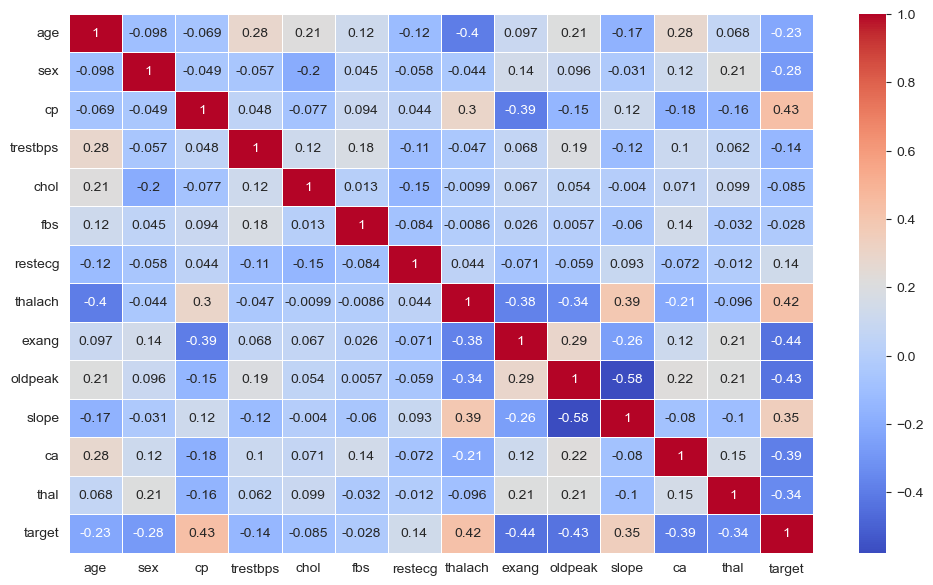

In [13]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

### Describe the relationship between cholesterol levels and a target variable

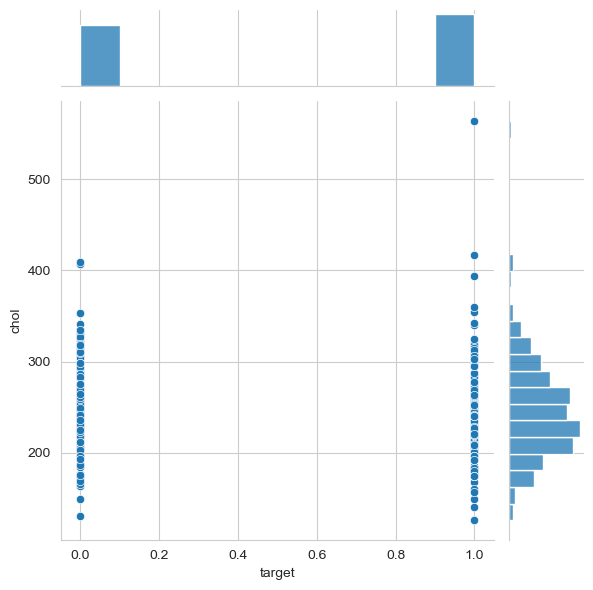

In [14]:
sns.jointplot(data=data,x='target', y='chol')

### State what relationship exists between peak exercising and the occurrence of a heart attack

<AxesSubplot: xlabel='oldpeak', ylabel='count'>

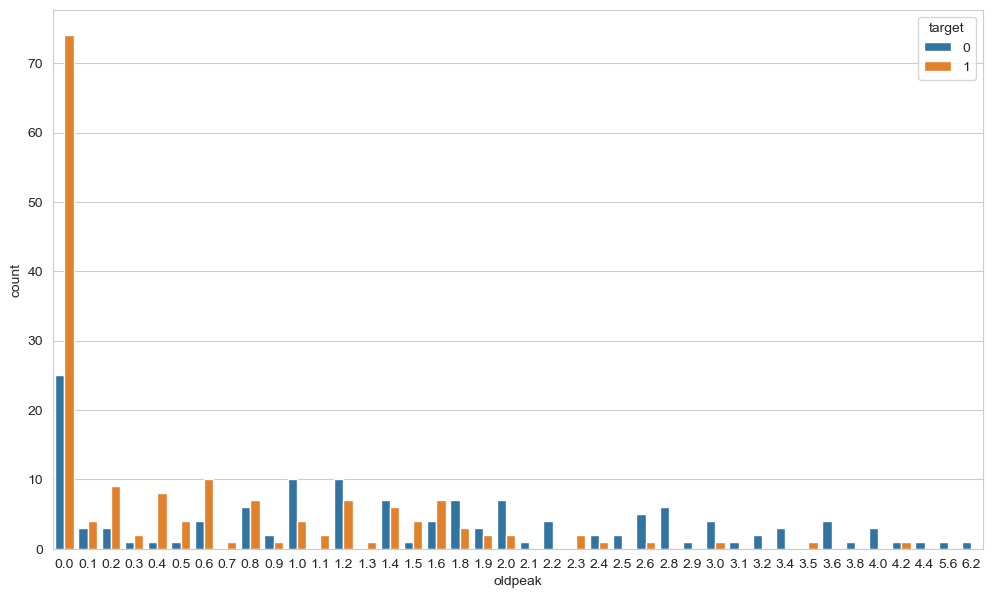

In [15]:
sns.countplot(data=data, x='oldpeak', hue='target')

<AxesSubplot: xlabel='oldpeak'>

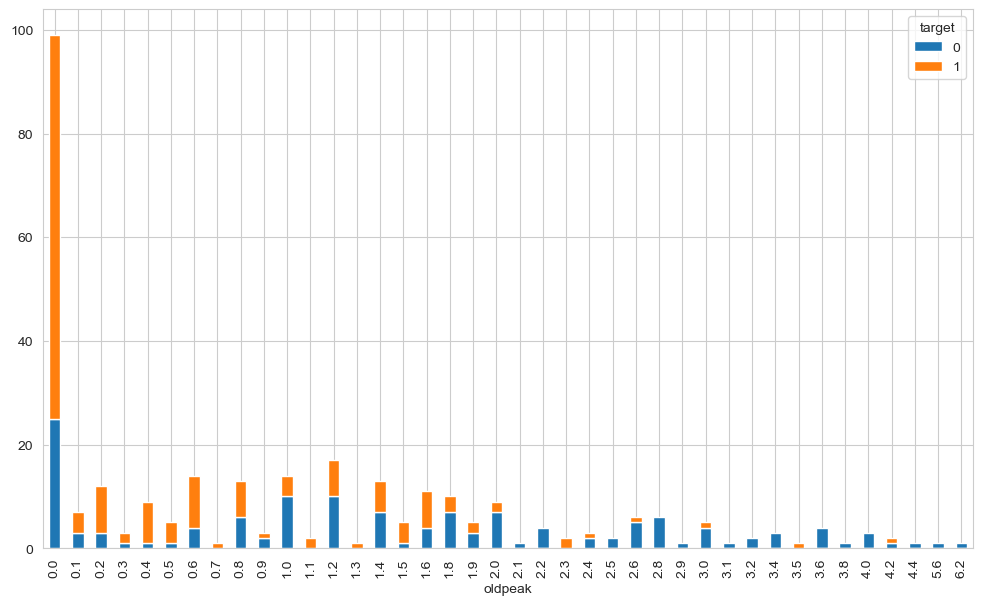

In [16]:
oldpeak_cvd_counts=data.groupby("oldpeak")['target'].value_counts().unstack()
oldpeak_cvd_counts.plot(kind='bar', stacked=True)

### as we seen from above two graphs with low exercise there is high risk in CVD 

### PAIRPLOT FOR ALL VARIABLES

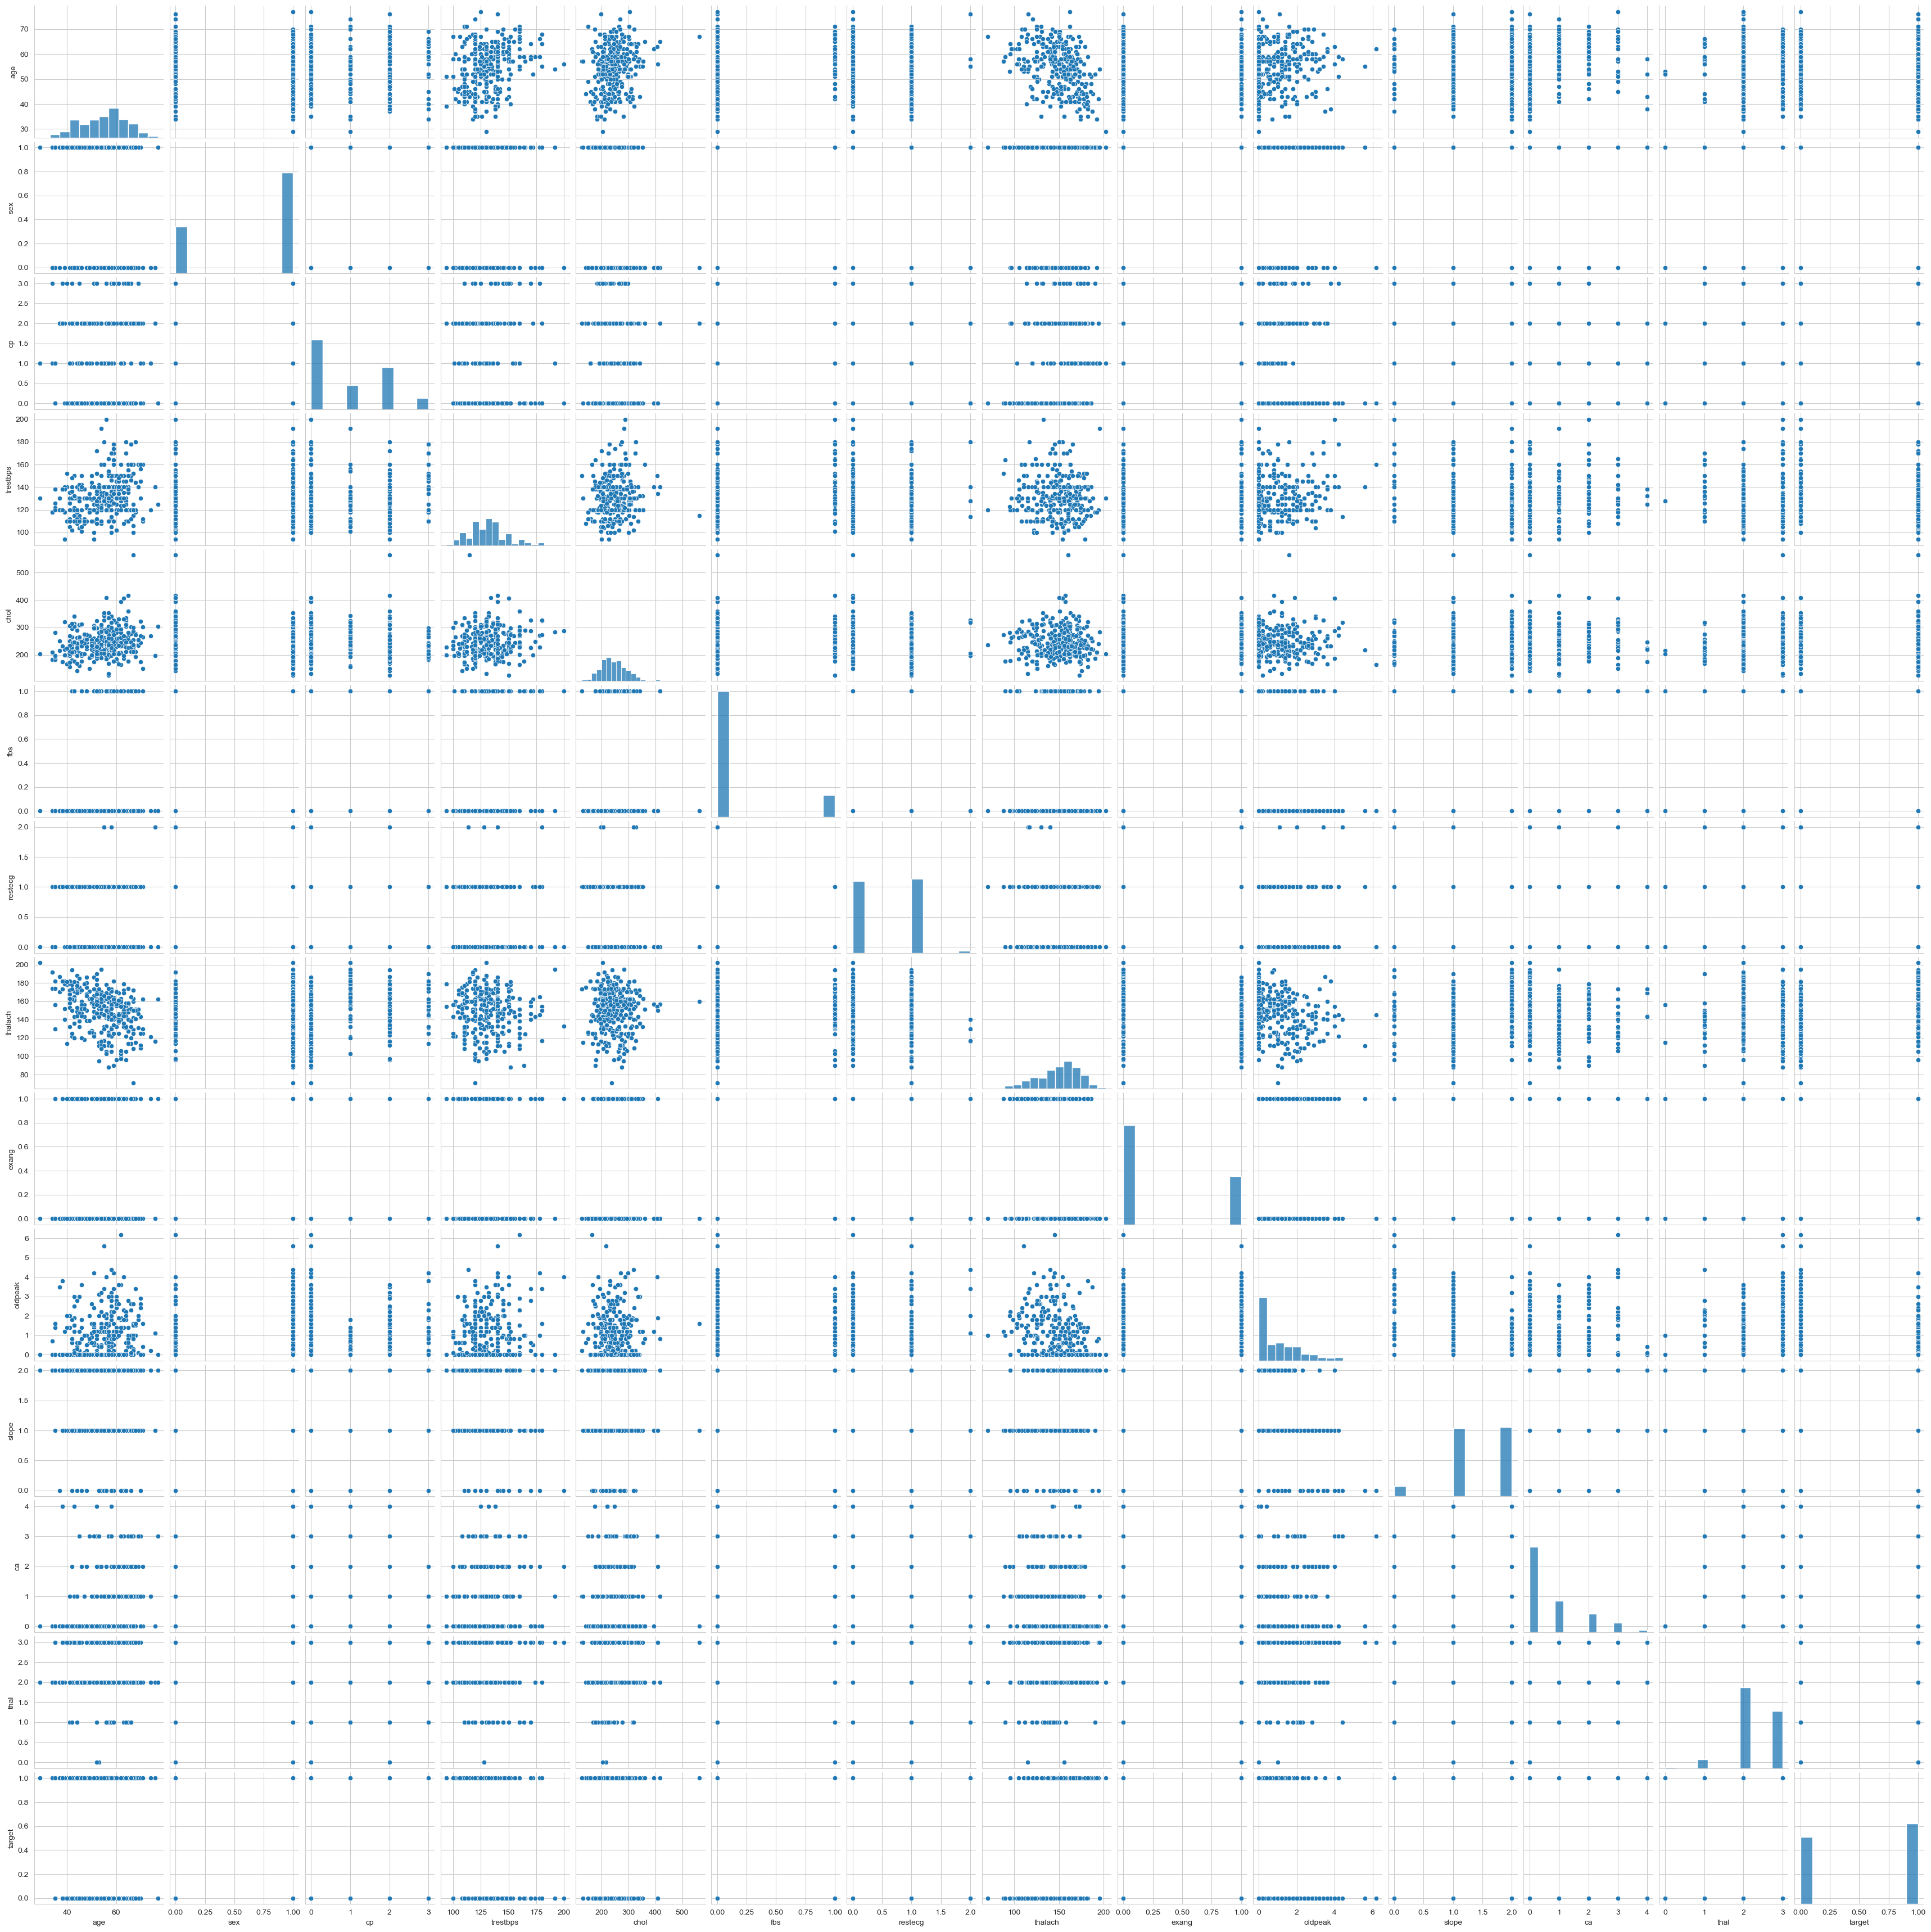

In [17]:
sns.pairplot(data)

#### Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

In [18]:
X=data.drop(['target'], axis=1)
Y=data['target']

In [19]:
sm.add_constant(X)

,const,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1.0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1.0,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1.0,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1.0,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1.0,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,1.0,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,1.0,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,1.0,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
model=sm.OLS(Y, X).fit()

In [21]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              76.48
Date:                Mon, 11 Sep 2023   Prob (F-statistic):                    1.48e-85
Time:                        18:59:58   Log-Likelihood:                         -112.42
No. Observations:                 303   AIC:                                      250.8
Df Residuals:                     290   BIC:                                      299.1
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0031      0.002      1.344      0.180      -0.001       0.008
sex           -0.1696      0.047     -3.626      0.000      -0.262      -0.078
cp             0.1112      0.023      4.910      0.000       0.067       0.156
trestbps      -0.0007      0.001     -0.596      0.552      -0.003       0.002
chol          -0.0001      0.000     -0.316      0.752      -0.001       0.001
fbs            0.0033      0.060      0.055      0.956      -0.115       0.122
restecg        0.0712      0.040      1.794      0.074      -0.007       0.149
thalach        0.0050      0.001      5.657      0.000       0.003       0.007
exang         -0.1194      0.051     -2.331      0.020      -0.220      -0.019
oldpeak       -0.0542      0.023     -2.344      0.020      -0.100      -0.009
slope          0.0888      0.043      2.077      0.039       0.005       0.173
ca            -0.1046      0.022     -4.737      0.000      -0.148      -0.061
thal          -0.1035      0.036     -2.903      0.004      -0.174      -0.033
==============================================================================
Omnibus:                        8.186   Durbin-Watson:                   1.046
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.464
Skew:                          -0.407   Prob(JB):                       0.0145
Kurtosis:                       2.920   Cond. No.                         961.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## As we saw from above summary that Prob (F-statistic) : 1.48e-85 which is less than standard p value 0.05. Hence the model is statistically significant

# MODEL BUILDING AND EVALUATION

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## LOGISTIC REGRESSION

In [23]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## RANDOM FOREST CLASSIFIER

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


In [25]:
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print(classification_report(y_test, y_pred_logistic))
print(confusion_matrix(y_test, y_pred_logistic))


Logistic Regression:
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61

[[25  4]
 [ 3 29]]


In [26]:
print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))


Random Forest:
Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

[[24  5]
 [ 5 27]]
